# Case Méliuz | Estágio em Estratégia : Cashback Rate 

Um dos principais objetivos do time de estratégia do Méliuz é o de otimizarsos diferentes modelos de negócios. Pensando nisso, realiarams um teste A/B) com duração de três meses. Nesse test ssa base  e
usuários foi dividida em 3 grupos de forma aleatória e cada grupo teve acess a
cashbacks diferentes em um determinado parceiro.

![logo](logomeliuz.jpg)

### Objetivo da Análise:
Definir qual a porcentagem de CashBack 
deve ser oferecida aos usuários.

### Perguntas de Negócio:

- 1. Qual grupo de usuários teve a melhor performance durante o período do teste?
- 2. Qual a porcentagem de cashback deveríamos oferecer para a base de clientes do Méliuz nesse parceiro?
- 3. Quais são as principais métricas que devem ser analisadas para essa tomada de decisão?
- 4. Quais são os principais objetivos do time de estratégia ao realizar esse teste?
- 5. Quais seriam outros testes e análises para incrementar os resultados desse modelo de negócios?

### Base de Dados:
https://docs.google.com/spreadsheets/d/1T5iBUC1gIcCjtKoxBkx85ieESnd-_2BzAksHOLRzI5U/edit?gid=0#gid=0

### Informações Gerais:
- **Coluna Data:** Contém as Datas das Vendas do Mês de Janeiro de 2011 a Abril de 2011.
- **Coluna Grupo de usuários:** Contém os grupos que foram divididos para o teste A/B (Grupo 1, 2 e 3).
- **Coluna Parceiro:** Contém o Parceiro que está oferecendo os CashBaks.
- **Coluna Compradores:** Contém o número de compradores.
- **Coluna Comissão:** Contém o valor da Comissão recebida.
- **Coluna Cashback:** Contém o valor do Cashback recebido.
- **Coluna Vendas Totais:** Contém o valor total de faturamento que o Parceiro recebeu com as vendas.

-------------------------------------------------------------------------------------------------

In [37]:
# Importando Bibliotecas Gerais.

import pandas as pd

df = pd.read_excel('Base de dados - Teste Méliuz.xlsx')
df = df.round()
df

,Data,Grupos de usuários,Parceiro,compradores,comissão,cashback,vendas totais
0,2011-01-01,Grupo 1,Parceiro A,196,10273.0,3267.0,93390.0
1,2011-01-02,Grupo 1,Parceiro A,115,7555.0,2060.0,68682.0
2,2011-01-03,Grupo 1,Parceiro A,82,4839.0,1358.0,43993.0
3,2011-01-04,Grupo 1,Parceiro A,172,10419.0,2907.0,94722.0
4,2011-01-05,Grupo 1,Parceiro A,187,11305.0,3138.0,102768.0
...,...,...,...,...,...,...,...
271,2011-03-29,Grupo 3,Parceiro A,72,3769.0,1713.0,34267.0
272,2011-03-30,Grupo 3,Parceiro A,70,4639.0,2109.0,42171.0
273,2011-03-31,Grupo 3,Parceiro A,88,5812.0,2642.0,52836.0
274,2011-04-01,Grupo 3,Parceiro A,74,5566.0,2530.0,50600.0


### Data Cleaning:
Limpando nossos dados e verificando a existência de dados inconsistentes, erros de formatação etc.

In [65]:
# Analisando a estrutura da nossa base de dados.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data                274 non-null    datetime64[ns]
 1   Grupos de usuários  274 non-null    object        
 2   Parceiro            274 non-null    object        
 3   compradores         274 non-null    int64         
 4   comissão            274 non-null    float64       
 5   cashback            274 non-null    float64       
 6   vendas totais       274 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 15.1+ KB


In [66]:
# Analisando a distribuição Estátistica dos nossos dados.
df.describe()

,Data,compradores,comissão,cashback,vendas totais
count,274,274.000000,274.000000,274.000000,274.000000
mean,2011-02-15 04:07:00.437956096,115.773723,7754.649635,4027.003650,68351.963504
min,2011-01-01 00:00:00,35.000000,2071.000000,565.000000,18831.000000
25%,2011-01-23 06:00:00,71.250000,4583.250000,1809.250000,41665.250000
50%,2011-02-15 00:00:00,96.000000,6430.000000,2840.500000,58458.000000
75%,2011-03-10 00:00:00,141.750000,9078.250000,5218.500000,82528.500000
max,2011-04-02 00:00:00,354.000000,25405.000000,18219.000000,230953.000000
std,NaN,61.709943,4595.200675,3227.638949,37518.432704


In [69]:
# Verificando se existem valores nulos.
df.isnull().sum()

Data                  0
Grupos de usuários    0
Parceiro              0
compradores           0
comissão              0
cashback              0
vendas totais         0
dtype: int64

-----------------------------------------------------------------

### OBERSERVAÇÕES:

 Identifiquei que a base de dados do case de estágio em Estratégia do Méliuz contém 4 meses (de janeiro a abril de 2011), e observei que todos os três grupos tiveram uma queda brusca em abril, possivelmente indicando que os dados desse mês são outliers. Por este motivo, estou considerando que o mês de abril pode ter sido fora do período de teste, ou seja, que os 3 meses de teste foram de janeiro a março de 2011.

Se o padrão de comportamento dos grupos foi consistente durante os três primeiros meses e mudou drasticamente em abril, isso pode indicar que abril estava fora do período de teste, ou que houve algum outro evento externo ou erro que afetou os dados. Um ponto importante a ser analisado a parte, pois em uma case real, não seria ideal apenas retirar o mês da análise, pois isso afetaria nos resultados finais e na precisão de tomadas de decisões.

**Mostrando Visualmente o problema que esses dados geram quando vamos realizar a análise**

- Imagem feita no Microsoft Power BI.
![Gráfico de Visualização de Outlier](Gráfico_Outlier.png)

- Pode-se reparar que todos grupos possuem quedas bruscas nos valores de Cashback no mês de Abril. Por isso, para não comprometer os valores da análise, vamos retirar esses dois dados referentes ao mês de Abril.

-------------------------------------------------------------------------------------------------------------

In [78]:
# Como são apenas as duas últimas linhas que estão com esses dados de Abril, vamos retirá-los.
df = df.iloc[:-2]
df

,Data,Grupos de usuários,Parceiro,compradores,comissão,cashback,vendas totais
0,2011-01-01,Grupo 1,Parceiro A,196,10273.0,3267.0,93390.0
1,2011-01-02,Grupo 1,Parceiro A,115,7555.0,2060.0,68682.0
2,2011-01-03,Grupo 1,Parceiro A,82,4839.0,1358.0,43993.0
3,2011-01-04,Grupo 1,Parceiro A,172,10419.0,2907.0,94722.0
4,2011-01-05,Grupo 1,Parceiro A,187,11305.0,3138.0,102768.0
...,...,...,...,...,...,...,...
267,2011-03-25,Grupo 3,Parceiro A,63,4289.0,1950.0,38991.0
268,2011-03-26,Grupo 3,Parceiro A,69,4351.0,1978.0,39552.0
269,2011-03-27,Grupo 3,Parceiro A,51,3398.0,1545.0,30893.0
270,2011-03-28,Grupo 3,Parceiro A,49,3088.0,1404.0,28075.0


### Análise Exploratória

#### Perguntas de Análise:
**Visão Geral:**
1. Qual foi o faturamento total do Parceiro A nesses 3 meses de teste?
2. Qual a receita do Parceiro A nesses 3 meses?

**Visão Detalhada:**
1. Qual grupo obteve o maior número de compradores durante os 3 meses?
2. Qual grupo obteve o maior CashBack? Em qual mês foi?
3. Qual a porcentagem de lucro que cada grupo gerou ao Parceiro A?
4. Qual foi o comportamento de valor de CashBack dos grupos com o passar dos meses?
5. Qual foi o comportamento dos compradores de cada grupo com o passar dos meses?

### Visão Geral

In [114]:
faturamento = df['vendas totais'].sum()
faturamento

18633431.0

In [90]:
total_comissões = df['comissão'].sum()
receita = faturamento - total_comissões
receita

16519108.0

- Imagem utilizada foi Importada do Excel.

- Soma de todas as vendas:
=SOMA('Dados Teste '!G:G)
- Total comissão:
=SOMA('Dados Teste '!E:E)
- Receita:
=SOMA('Dados Teste '!G:G) – A6

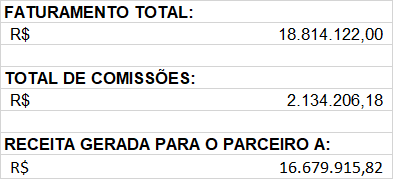15,82 


----------------------------------------------------------------------------------------------------------

### Visão Detalhada

![Respondendo Perguntas de Negócio](case_meliuz.png)

- Relatório criado no Microsoft Power BI.

----------------------------------------------------------------------------------------------------------

### Respondendo Perguntas de Negócio.

#### 1. Qual grupo de usuários teve a melhor performance durante o período do teste?

Ao analisar o desempenho dos grupos de usuários durante o período do teste, podemos considerar duas perspectivas: a performance inicial (números absolutos) e a sustentabilidade ao longo do tempo (tendências e estabilidade).

**Perspectiva 1: Performance Inicial (Números Absolutos)**
O Grupo 3 obteve os melhores números absolutos em termos de receita e cashback no mês de janeiro:

- **Total de Compradores:** O Grupo 3 teve 5,5 mil compradores em janeiro, o maior número entre todos os grupos nesse mês.
- **Receita Gerada:** O Grupo 3 gerou uma receita de 5,62 milhões, representando 34,23% da receita total, a maior entre os três grupos.
- **Cashback:** Em termos de média de cashback, o Grupo 3 atingiu R$8,4 mil em janeiro, novamente o valor mais alto do período.

Esses números indicam que o Grupo 3 respondeu de forma muito positiva ao incentivo do cashback, especialmente no início do teste.

**Perspectiva 2: Sustentabilidade e Tendência de Crescimento (Estabilidade)**
No entanto, é importante observar a evolução desses números ao longo do tempo, e aqui o desempenho do Grupo 1 se destaca:

**Estabilidade e Crescimento:** Embora o Grupo 1 não tenha atingido os maiores valores absolutos, ele apresentou um aumento tanto na média de cashback quanto no número de compradores ao longo do tempo. Em janeiro, o Grupo 1 teve 4,3 mil compradores e em março, 2,8 mil, mostrando uma redução menor comparada aos outros grupos.
**Média de Cashback:** O cashback no Grupo 1 subiu de 2,4 mil em janeiro para 3,4 mil em março, o que demonstra um comportamento mais estável e sustentável.

Enquanto o Grupo 3 teve uma forte performance inicial, ele não conseguiu manter esse impulso, resultando em uma queda tanto no número de compradores quanto na média de cashback nos meses seguintes. Por outro lado, o Grupo 1 mostrou uma tendência de crescimento e uma resposta mais consistente ao longo do tempo.

**Conclusão:**
- **Grupo 3:** Desempenhou-se muito bem no início, com números absolutos impressionantes em janeiro, mas não conseguiu manter esse desempenho nos meses subsequentes.
- **Grupo 1:** Embora os números iniciais fossem mais modestos, o Grupo 1 mostrou uma tendência de crescimento e estabilidade, o que pode ser mais indicativo de um sucesso sustentável e de longo prazo.

Portanto, a escolha do "melhor" grupo depende dos objetivos estratégicos. Se o objetivo é maximizar o impacto no curto prazo, o Grupo 3 seria o escolhido. No entanto, se o foco é a sustentabilidade e o crescimento contínuo, o Grupo 1 pode ser considerado o grupo de melhor desempenho ao longo do teste.

#### 2. Qual a porcentagem de cashback deveríamos oferecer para a base de clientes do Méliuz nesse parceiro?
**Análise:** Considerando a performance dos grupos, parece que um cashback mais elevado, como o oferecido ao Grupo 3, gera uma maior resposta em termos de compradores e receita. No entanto, é importante balancear o custo desse cashback com a margem de lucro. Portanto, um cashback similar ao oferecido ao Grupo 3 (potencialmente em torno de 5% a 8%) pode ser ideal para maximizar o engajamento sem comprometer demais a margem de lucro.

**Motivadores:** A decisão deve se basear na análise do aumento de receita e no número de compradores em resposta ao cashback. Além disso, a média de cashback por grupo sugere que os valores mais altos tiveram um impacto positivo no comportamento de compra.

#### 3. Quais são as principais métricas que devem ser analisadas para essa tomada de decisão?
**Métricas Principais:**
- **Número de Compradores:** Para medir a eficácia do cashback em atrair mais usuários.
- **Receita Gerada:** Para entender o impacto financeiro do cashback.
- **Média de Cashback por Mês:** Para avaliar o custo do cashback e seu impacto.
- **Retorno sobre Investimento (ROI):** Para assegurar que o cashback oferecido está resultando em um aumento líquido de receita.
- **Take Rate:** Para monitorar a comissão recebida por venda e seu impacto na margem de lucro.

#### 4. Quais são os principais objetivos do time de estratégia ao realizar esse teste?
**Objetivos Prováveis:**
- Determinar o cashback ideal que maximiza tanto o número de compradores quanto a receita gerada.
- Analisar o comportamento dos usuários em resposta a diferentes níveis de cashback.
- Avaliar a elasticidade do cashback, ou seja, até que ponto o aumento ou diminuição do cashback impacta nas vendas e na receita.
- Identificar segmentos de clientes que respondem melhor a diferentes incentivos.


#### 5. Quais seriam outros testes e análises para incrementar os resultados desse modelo de negócios?
- **Testes de Elasticidade de Cashback:** Realizar testes adicionais com diferentes faixas de cashback para determinar a elasticidade da demanda.
- **Segmentação Avançada:** Analisar o comportamento de diferentes segmentos de usuários, como novos versus antigos clientes, para ofertas mais personalizadas.
- **Teste de Canal de Comunicação:** Experimentar diferentes métodos de comunicar o cashback (e-mail, app, etc.) para ver qual gera maior engajamento.
- **Análise de Longo Prazo:** Estudar o comportamento de recompra e a fidelidade dos clientes que receberam o cashback mais alto versus os que receberam o mais baixo.

----------------------------------------------------------------------------------------------